In [1]:
!pip install --upgrade pip setuptools
!pip install matplotlib

In [3]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [5]:
from functools import partial
from keras import backend as K
from keras import callbacks
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, models
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model

In [7]:
folds = pd.read_csv("/Users/renitalewis/Downloads/archive/Folds.csv")
df = pd.DataFrame(folds.iloc[:7909])
df["label"] = df["filename"].apply(lambda x: x.split("/")[3])
df['label'] = df['label'].str.strip()

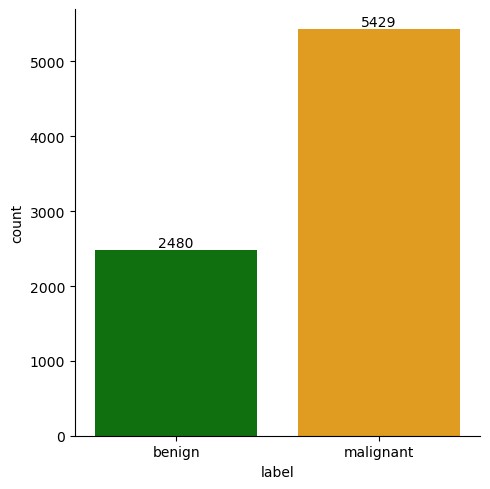

In [9]:
g = sns.catplot(x="label", data=df, kind="count", hue="label", palette=['green', 'orange'], legend=False)
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container)
plt.show()

In [11]:
df['label_int'] = df.label.apply(lambda x: ['benign', 'malignant'].index(x))
X_train, X_test, y_train, y_test = train_test_split(df["filename"], df["label_int"], test_size=0.2, random_state=42)

In [13]:
train_loader = tf.data.Dataset.from_tensor_slices(("/Users/renitalewis/Desktop/ProjectFolder/archive/BreaKHis_v1/" + X_train, y_train))
test_loader = tf.data.Dataset.from_tensor_slices(("/Users/renitalewis/Desktop/ProjectFolder/archive/BreaKHis_v1/" + X_test, y_test))

def parse_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    return img, label

def resize_rescale(image, label):
    img = tf.cast(image, tf.float32)
    img = tf.image.resize(img, [64, 64]) / 255.0
    return img, label


In [15]:
X_trainset = train_loader.shuffle(len(X_train)).map(parse_image).map(resize_rescale).batch(64)
X_testset = test_loader.shuffle(len(X_test)).map(parse_image).map(resize_rescale).batch(64)

2024-07-10 05:11:18.443491: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


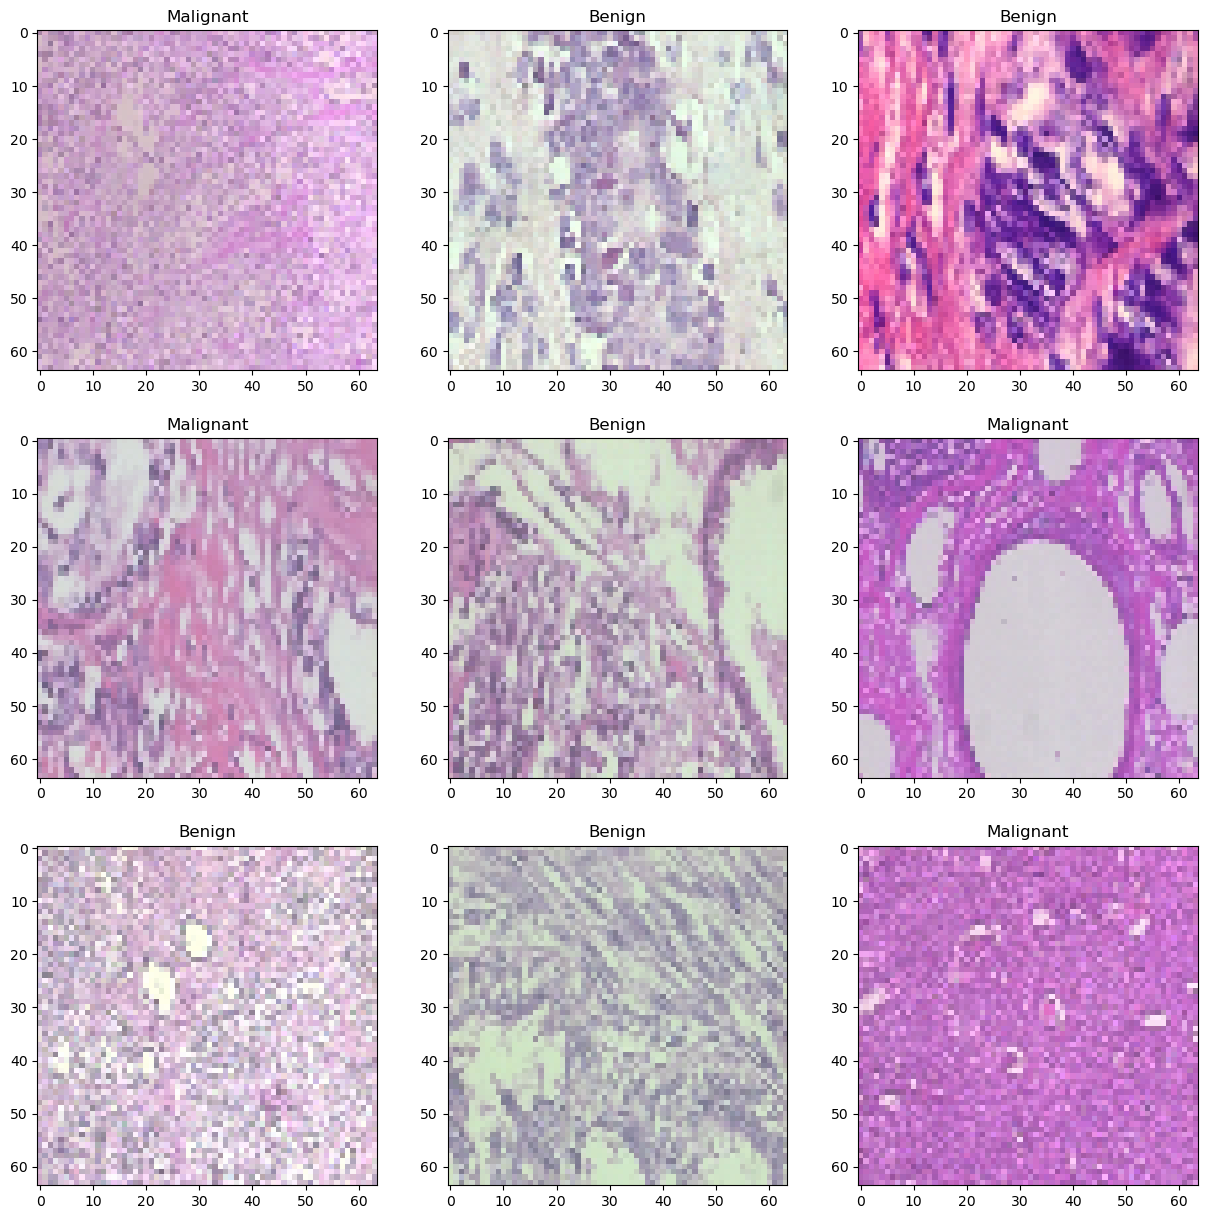

In [17]:
fig = plt.figure(figsize=(15, 15))
for i, img in enumerate(X_trainset.take(9)):
    ax = fig.add_subplot(3, 3, i+1)
    if tf.keras.backend.get_value(img[1][i]) == 0:
       ax.title.set_text("Benign")
    else:
       ax.title.set_text("Malignant")
    plt.imshow(img[0][i])
plt.show()

In [19]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [29]:
X_train_features = []
y_train_labels = []
for img, label in X_trainset:
    features = base_model.predict(img)
    X_train_features.append(features)
    y_train_labels.extend(label.numpy())

X_train_features = np.concatenate(X_train_features, axis=0)
y_train_labels = np.array(y_train_labels)

X_test_features = []
y_test_labels = []
for img, label in X_testset:
    features = base_model.predict(img)
    X_test_features.append(features)
    y_test_labels.extend(label.numpy())

X_test_features = np.concatenate(X_test_features, axis=0)
y_test_labels = np.array(y_test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 394ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

2024-07-10 05:19:26.749717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


2024-07-10 05:19:42.299348: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [33]:
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

In [35]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_features_flat, y_train_labels)

In [37]:
unique, counts = np.unique(y_train_resampled, return_counts=True)
print("Class distribution after oversampling:", dict(zip(unique, counts)))

Class distribution after oversampling: {0: 4357, 1: 4357}


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_features_flat = scaler.transform(X_test_features_flat)

In [41]:
model = Sequential([
    Input(shape=(X_train_resampled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
EPOCHS = 100
history = model.fit(X_train_resampled, y_train_resampled, epochs=EPOCHS, validation_data=(X_test_features_flat, y_test_labels))

Epoch 1/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6739 - loss: 0.6083 - val_accuracy: 0.7509 - val_loss: 0.5096
Epoch 2/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7697 - loss: 0.4891 - val_accuracy: 0.7636 - val_loss: 0.4988
Epoch 3/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7973 - loss: 0.4476 - val_accuracy: 0.7358 - val_loss: 0.5399
Epoch 4/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8139 - loss: 0.4084 - val_accuracy: 0.7579 - val_loss: 0.5302
Epoch 5/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8317 - loss: 0.3739 - val_accuracy: 0.7566 - val_loss: 0.5364
Epoch 6/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8497 - loss: 0.3443 - val_accuracy: 0.7522 - val_loss: 0.5667
Epoch 7/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8691 - loss: 0.3194 - val_accuracy: 0.7649 - val_loss: 0.5738
Epoch 8/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8786 - loss: 0.2986 - 

In [49]:
loss, accuracy = model.evaluate(X_test_features_flat, y_test_labels)
print(f"Test Accuracy: {accuracy}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7685 - loss: 2.4861
Test Accuracy: 0.771175742149353


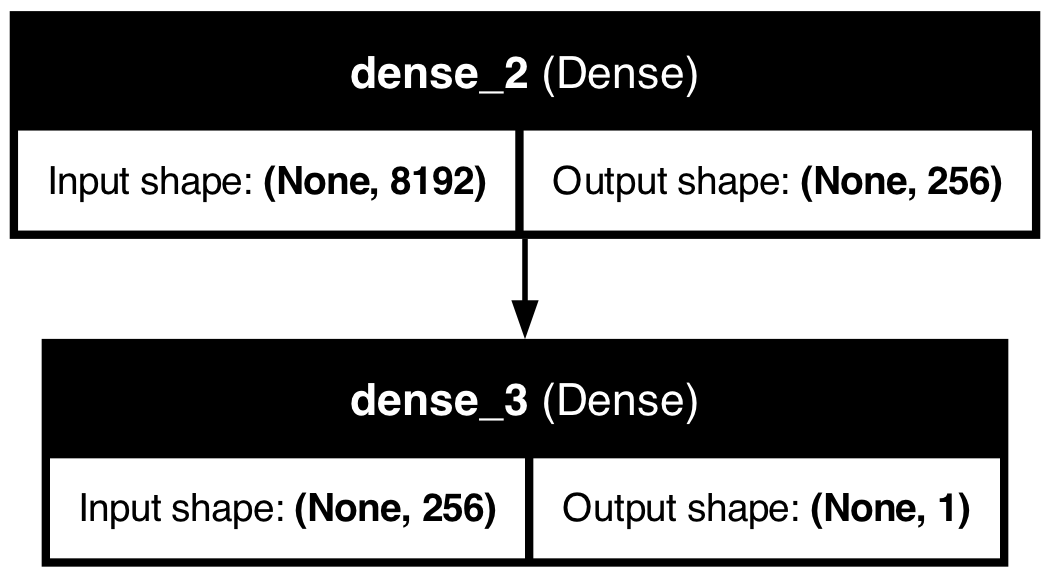

In [67]:
import os

# Ensure the PATH includes the directory where `dot` is located
os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin'

from tensorflow.keras.utils import plot_model

# Assuming 'model' is already defined
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [51]:
y_pred = model.predict(X_test_features_flat)
y_pred = (y_pred > 0.5).astype(int)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [53]:
print(f"Predicted labels: {np.unique(y_pred, return_counts=True)}")
print(f"True labels: {np.unique(y_test_labels, return_counts=True)}")

Predicted labels: (array([0, 1]), array([ 466, 1116]))
True labels: (array([0, 1]), array([ 510, 1072]))


In [55]:
print(classification_report(y_test_labels, y_pred))
conf_mat = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:\n", conf_mat)

              precision    recall  f1-score   support

           0       0.66      0.60      0.63       510
           1       0.82      0.85      0.83      1072

    accuracy                           0.77      1582
   macro avg       0.74      0.73      0.73      1582
weighted avg       0.77      0.77      0.77      1582

Confusion Matrix:
 [[307 203]
 [159 913]]


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


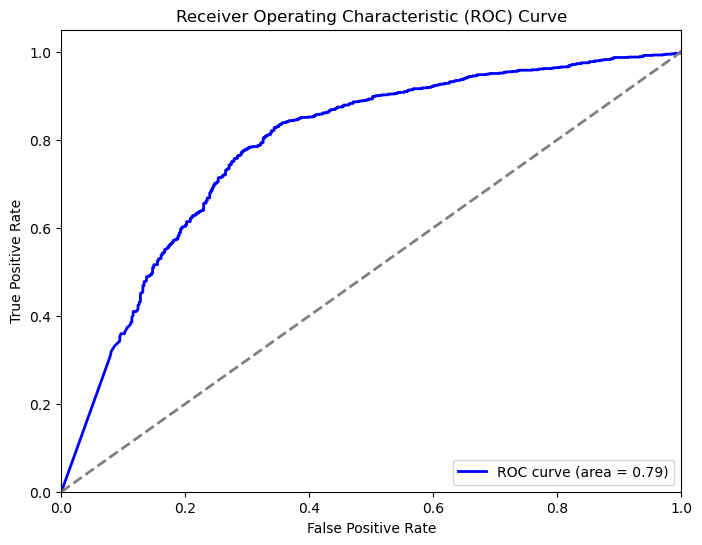

In [59]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_labels, model.predict(X_test_features_flat))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


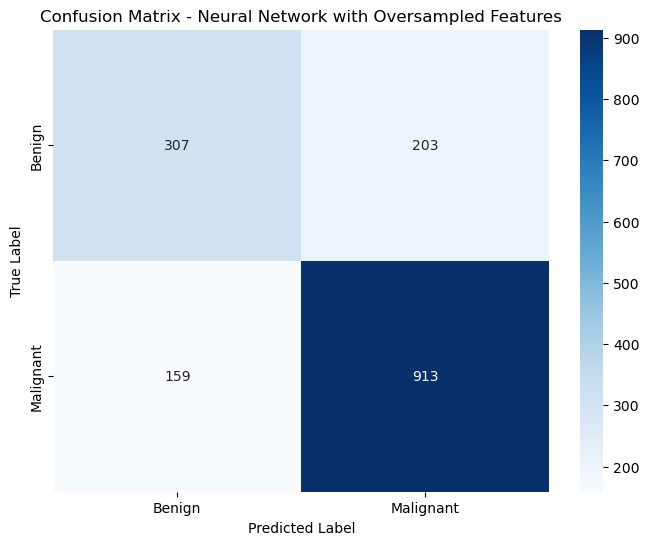

In [63]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Neural Network with Oversampled Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

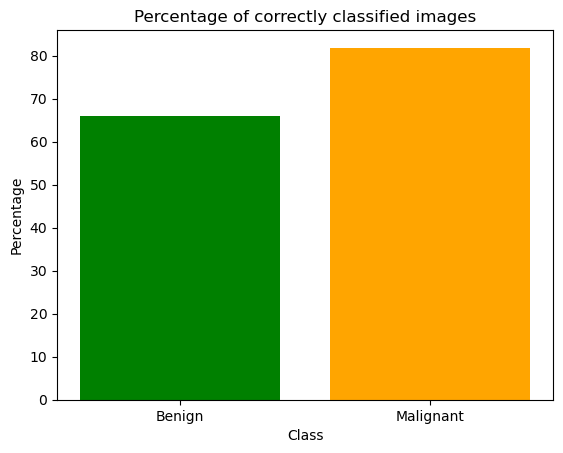

In [69]:
def plotScoresHist(conf_mat):
    scores = pd.DataFrame(conf_mat)
    classes = [0, 1]
    p = [scores[i].to_numpy()[i] / scores[i].to_numpy().sum() * 100 for i in classes]
    plt.bar(["Benign", "Malignant"], p, color=['green', 'orange'])
    plt.title("Percentage of correctly classified images")
    plt.xlabel('Class')
    plt.ylabel('Percentage')
    plt.xticks(["Benign", "Malignant"])
    plt.show()

plotScoresHist(conf_mat)

Balancing the dataset using Data Augmentation

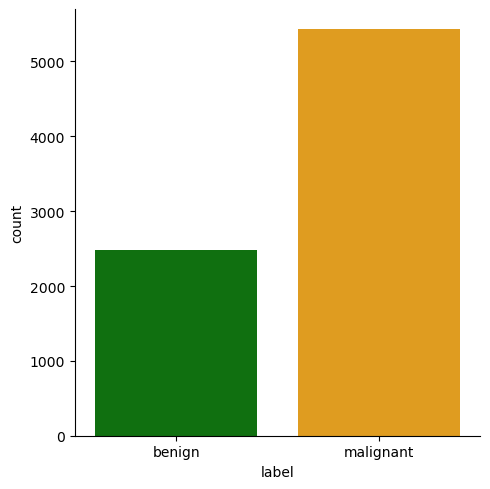

2024-07-18 05:39:18.236455: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:39: Filling up shuffle buffer (this may take a while): 3072 of 6327
2024-07-18 05:39:29.031091: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-07-18 05:39:29.309766: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


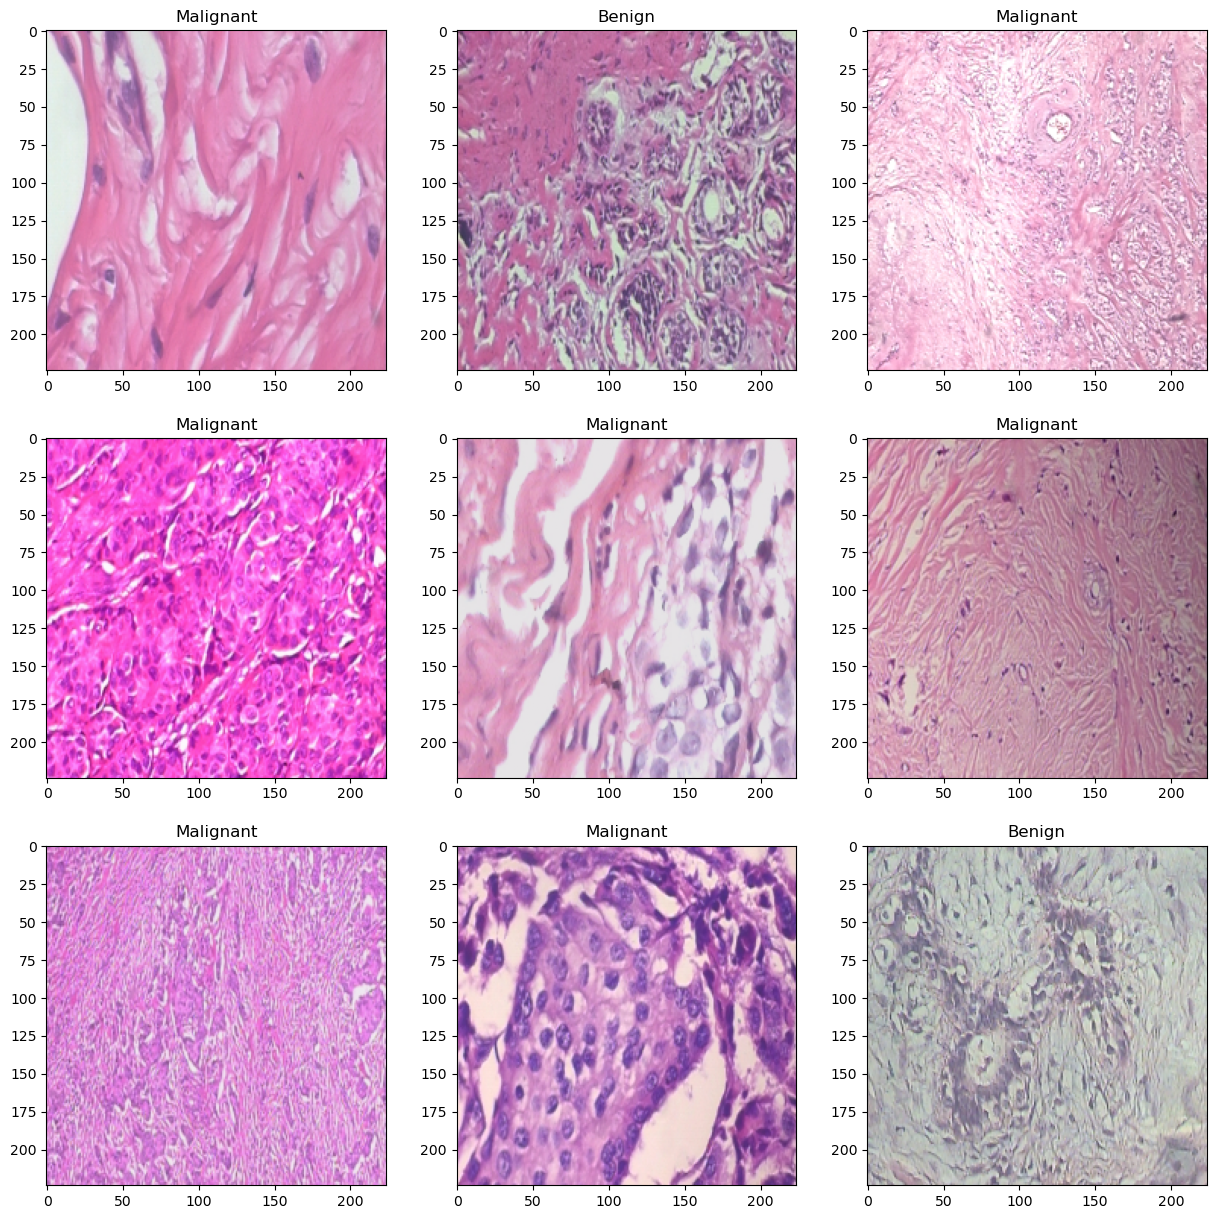

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,723,138 (90.50 MB)

 Trainable params: 135,426 (529.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/25


2024-07-18 05:39:42.653526: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:39: Filling up shuffle buffer (this may take a while): 3009 of 6327
2024-07-18 05:39:53.503170: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


99/99 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.4979 - loss: 0.7062 - val_accuracy: 0.3717 - val_loss: 0.7284
Epoch 2/25


2024-07-18 05:43:41.358647: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:39: Filling up shuffle buffer (this may take a while): 3036 of 6327
2024-07-18 05:43:51.361248: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:39: Filling up shuffle buffer (this may take a while): 6163 of 6327
2024-07-18 05:43:51.889314: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


99/99 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - accuracy: 0.5374 - loss: 0.6823 - val_accuracy: 0.5588 - val_loss: 0.6707
Epoch 3/25


2024-07-18 05:47:53.114177: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:39: Filling up shuffle buffer (this may take a while): 2964 of 6327
2024-07-18 05:48:04.278193: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


99/99 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.5263 - loss: 0.6797 - val_accuracy: 0.5518 - val_loss: 0.6721
Epoch 4/25


2024-07-18 05:52:21.565489: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:39: Filling up shuffle buffer (this may take a while): 2756 of 6327
2024-07-18 05:52:34.252184: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


99/99 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.5704 - loss: 0.6698 - val_accuracy: 0.4260 - val_loss: 0.7140
Epoch 5/25


2024-07-18 05:56:58.079532: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:39: Filling up shuffle buffer (this may take a while): 2641 of 6327
2024-07-18 05:57:11.937107: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


99/99 ━━━━━━━━━━━━━━━━━━━━ 287s 3s/step - accuracy: 0.5252 - loss: 0.6733 - val_accuracy: 0.3938 - val_loss: 0.7211
Epoch 6/25


2024-07-18 06:01:44.768011: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:39: Filling up shuffle buffer (this may take a while): 2745 of 6327
2024-07-18 06:01:54.771490: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:39: Filling up shuffle buffer (this may take a while): 5507 of 6327
2024-07-18 06:01:57.844237: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


99/99 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step - accuracy: 0.5487 - loss: 0.6756 - val_accuracy: 0.4330 - val_loss: 0.7012
Epoch 7/25


2024-07-18 06:06:20.528511: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:39: Filling up shuffle buffer (this may take a while): 2712 of 6327
2024-07-18 06:06:30.530151: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:39: Filling up shuffle buffer (this may take a while): 5459 of 6327
2024-07-18 06:06:33.640744: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


99/99 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.5190 - loss: 0.6682 - val_accuracy: 0.4880 - val_loss: 0.6888
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5615 - loss: 0.6695


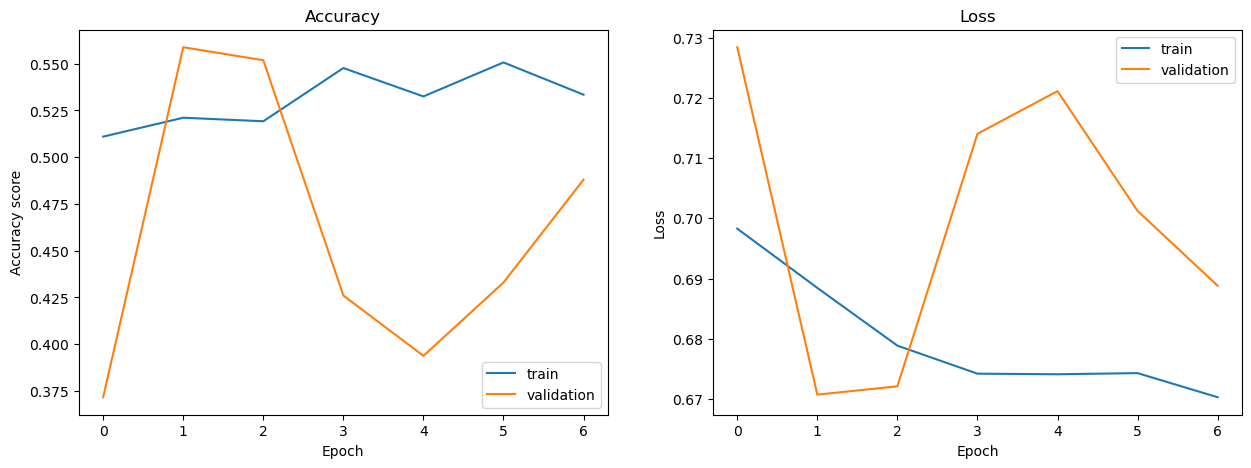

25/25 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step
              precision    recall  f1-score   support

      Benign       0.35      0.44      0.39       510
   Malignant       0.70      0.61      0.65      1072

    accuracy                           0.56      1582
   macro avg       0.53      0.53      0.52      1582
weighted avg       0.59      0.56      0.57      1582



2024-07-18 06:12:43.966621: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


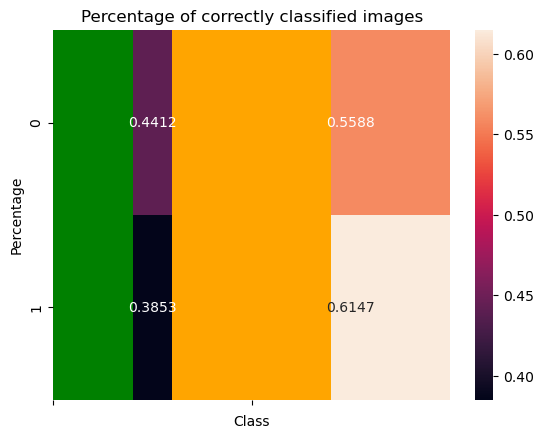

In [32]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from keras import callbacks
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential


folds = pd.read_csv("/Users/renitalewis/Downloads/archive/Folds.csv")
df = folds.iloc[:7909].copy()
df["label"] = df["filename"].apply(lambda x: x.split("/")[3]).str.strip()


sns.catplot(x="label", data=df, kind="count", hue="label", palette=['green', 'orange'], legend=False)
plt.show()


df['label_int'] = df['label'].apply(lambda x: ['benign', 'malignant'].index(x))


X_train, X_test, y_train, y_test = train_test_split(df["filename"], df["label_int"], test_size=0.2, random_state=42)


def parse_image(filename, label):
    img = tf.io.read_file(filename)
    img = tf.image.decode_png(img, channels=3)
    return img, label

def resize_rescale(image, label):
    img = tf.cast(image, tf.float32)
    img = tf.image.resize(img, [224, 224]) / 255.0  # ResNet50 expects 224x224 input size
    return img, label

def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    return image, label


train_filenames = "/Users/renitalewis/Desktop/ProjectFolder/archive/BreaKHis_v1/" + X_train
test_filenames = "/Users/renitalewis/Desktop/ProjectFolder/archive/BreaKHis_v1/" + X_test


train_loader = tf.data.Dataset.from_tensor_slices((train_filenames, y_train))
test_loader = tf.data.Dataset.from_tensor_slices((test_filenames, y_test))

X_trainset = train_loader.map(parse_image).map(augment_image).map(resize_rescale).shuffle(len(X_train)).batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)
X_testset = test_loader.map(parse_image).map(resize_rescale).batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)


fig = plt.figure(figsize=(15, 15))
for images, labels in X_trainset.take(1):
    for i in range(9):
        ax = fig.add_subplot(3, 3, i + 1)
        ax.set_title("Benign" if labels.numpy()[i] == 0 else "Malignant")
        plt.imshow(images.numpy()[i])
plt.show()


input_shape = (224, 224, 3)
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
base_model.trainable = False  # Freeze the base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(2, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.build(input_shape=(None, 224, 224, 3))
model.summary()


def plotTrainingHistory(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(history.history['accuracy'], label='train')
    ax1.plot(history.history['val_accuracy'], label='validation')
    ax1.set_title('Accuracy')
    ax1.set_ylabel('Accuracy score')
    ax1.set_xlabel('Epoch')
    ax1.legend()

    ax2.plot(history.history['loss'], label='train')
    ax2.plot(history.history['val_loss'], label='validation')
    ax2.set_title('Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend()
    plt.show()


class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}


earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights=True)


history = model.fit(X_trainset, epochs=25, verbose=1, validation_data=X_testset, callbacks=[earlystopping], class_weight=class_weights)


score = model.evaluate(X_testset)
plotTrainingHistory(history)


y_test_pred = model.predict(X_testset)
predicted_categories = tf.argmax(y_test_pred, axis=1)
true_categories = tf.concat([y for x, y in X_testset], axis=0)
print(classification_report(true_categories, predicted_categories, target_names=["Benign", "Malignant"]))

# Confusion matrix
conf_mat = confusion_matrix(true_categories, predicted_categories, normalize='true')
sns.heatmap(conf_mat, annot=True, fmt='.4g')


def plotScoresHist(conf_mat):
    scores = pd.DataFrame(conf_mat)
    classes = [0, 1]
    p = [scores[i].to_numpy()[i] / scores[i].to_numpy().sum() * 100 for i in classes]
    plt.bar(["Benign", "Malignant"], p, color=['green', 'orange'])
    plt.title("Percentage of correctly classified images")
    plt.xlabel('Class')
    plt.ylabel('Percentage')
    plt.xticks(["Benign", "Malignant"])
    plt.show()

plotScoresHist(conf_mat)
